In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data_split import view_split

### Visualize Retina data splits

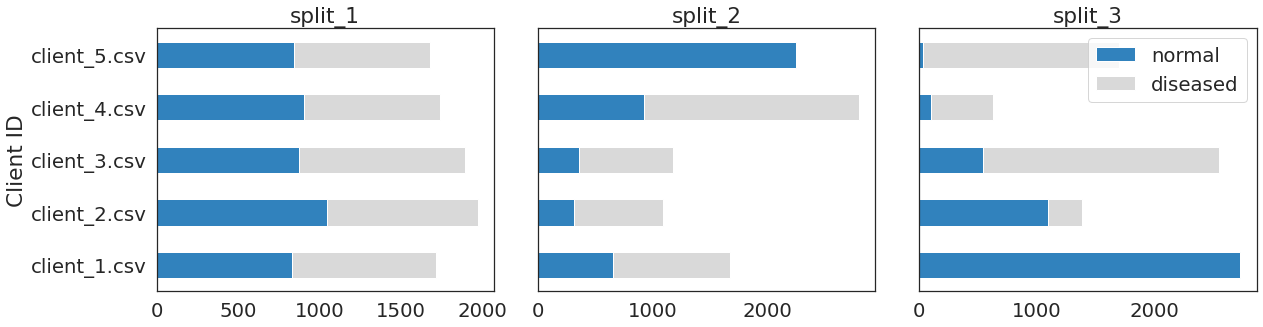

In [2]:
data_path='./Retina'
out = view_split(data_path, save_plot=False)
df = pd.DataFrame(out)

sns.set(font_scale = 1.8, style="white")
f, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, split_id in enumerate(['split_1', 'split_2', 'split_3']):
    df_split = df.loc[:,split_id].apply(pd.Series)
    df_split = df_split.reindex(sorted(df_split.columns), axis=1)
    df_split = df_split.sort_index(axis=0)
    df_split['Client ID'] = df_split.index
    
    df_split = df_split.rename(columns={0.0: "normal", 1.0: "diseased"})
    df_split.plot(x='Client ID', kind='barh', rot=0, stacked=True, 
                  cmap='tab20c',
                  title=split_id, ax=axes[i], legend=False)

    if i in [1,2]:
        axes[i].set_yticks([])
        axes[i].set(ylabel=None)
    
    axes[i].set_title(split_id)

axes[2].legend()
f.tight_layout()

plt.show()

### Visualize COVID-FL data splits

In [3]:
data_path='./COVID-FL'
out = view_split(data_path, n_clients=12, save_plot=False)
df = pd.DataFrame(out)

fig = plt.figure(figsize=(20,13))
sns.set(font_scale = 1.2, style="white")

split_id = 'split_real'
df_split = df.loc[:,split_id].apply(pd.Series)
df_split = df_split.reindex(sorted(df_split.columns), axis=1)
df_split = df_split.sort_index(axis=0)
df_split['Client ID'] = sorted(df_split.index)

df_split = df_split.rename(columns={0.0: "normal", 1.0: "pneumonia", 2.0: "COVID-19"})
df_split.plot(x='Client ID', kind='barh', rot=0, stacked=True, cmap='tab20c', title=split_id)

plt.legend()
f.tight_layout()

plt.show()